In [3]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import trim_mean

In [24]:
file_path = '/Users/bobbymarriott/Desktop/Project/house_sales.csv'

In [25]:
# Loading the filepath into a variable and then printing the first five rows of the csv file

df = pd.read_csv(file_path)

In [26]:
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [27]:
# Printing out the rows and columns of the dataset to highlight the dimensions

print("Dimensions", df.shape)

Dimensions (21613, 21)


In [28]:
# The datatypes of each column are found using the dtypes command

print("Data Types:/n", df.dtypes)

Data Types:/n id                 int64
date              object
price              int64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


## The filetype is csv and the import method was through Pandas

In [29]:
# Displaying the null values in each column

null_data = df.isnull().sum()
print(null_data)

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64


In [30]:
df['price'].describe().apply(lambda x: format(x, 'f'))

count      21613.000000
mean      540088.141767
std       367127.196483
min        75000.000000
25%       321950.000000
50%       450000.000000
75%       645000.000000
max      7700000.000000
Name: price, dtype: object

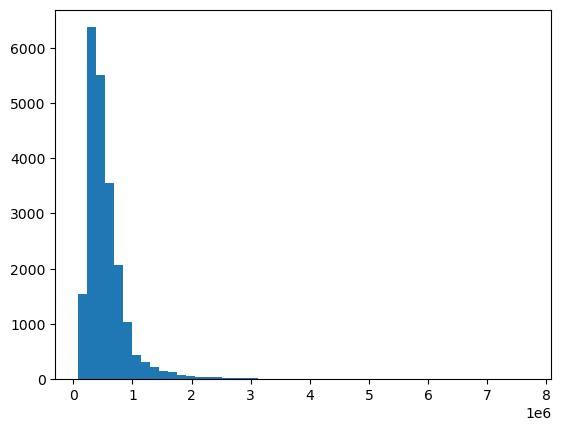

In [31]:
plt.hist(df['price'], bins = 50)
plt.show()

In [32]:
trimmed_mean = trim_mean(df['price'], .01)
print(trimmed_mean)

522158.7840517445


In [33]:
# Clean, wrangle, and handle missing data

# Imputing, reshaping, creating new dataframes?  
# BOBBY

# Taking the current date format with TXXXXX and turning it into a normal date format of YYYY MM DD 
df['date'] = pd.to_datetime(df['date'], format='%Y%m%dT%H%M%S')

# Taking the new format out of the dataframe
df['date'] = df['date'].dt.date

# Saving a new edited CSV and then printing it out to show 
df.to_csv('house_file_v2.csv', index=False)
date_time_cleaned = pd.read_csv('house_file_v2.csv')

print(date_time_cleaned.head())

           id        date   price  bedrooms  bathrooms  sqft_living  sqft_lot  \
0  7129300520  2014-10-13  221900       3.0       1.00       1180.0    5650.0   
1  6414100192  2014-12-09  538000       3.0       2.25       2570.0    7242.0   
2  5631500400  2015-02-25  180000       2.0       1.00        770.0   10000.0   
3  2487200875  2014-12-09  604000       4.0       3.00       1960.0    5000.0   
4  1954400510  2015-02-18  510000       3.0       2.00       1680.0    8080.0   

   floors  waterfront  view  ...  grade  sqft_above  sqft_basement  yr_built  \
0     1.0           0     0  ...      7        1180              0      1955   
1     2.0           0     0  ...      7        2170            400      1951   
2     1.0           0     0  ...      6         770              0      1933   
3     1.0           0     0  ...      7        1050            910      1965   
4     1.0           0     0  ...      8        1680              0      1987   

   yr_renovated  zipcode      la

In [45]:
# Working with the new dataframe created for the date change
# Drop 0 bedrooms or 0 bathrooms
date_time_cleaned = pd.read_csv('/Users/bobbymarriott/Desktop/Project/house_file_v2.csv')

# We do not want to show any home with 0 bedrooms or 0 bathrooms
date_time_cleaned = date_time_cleaned[(date_time_cleaned['bedrooms'] != 0) & (date_time_cleaned['bathrooms'] != 0)]

# Saving this into a new csv again
date_time_cleaned.to_csv('filtered_date_time_cleaned.csv', index=False)


# Exclude luxury homes : past 3

# Cut the bottom and top 1%

In [ ]:
# BOBBY AND TORI

# GroupBy Price, each of these 4 columns // Imputing

In [1]:
# PATRICIO

# Transform data with aggregation, normalization, and feature construction

# Create a new column 'price per square foot' using the house price and the sqft_living

# Turn condition column into categorical data

# Convert year built to age 

# Change 33 bedroom to 3 

In [2]:
#EVERYONE 

# Reduce redudnant data and perform need-based discretization 

# Removing duplicates

# Remove view, grade, long/lat 